# <font color='blue'>QNET Example Code</font> 

## 1. Satellite Simulation 

In [1]:
import QNET
import LinearGenerator as LG
import matplotlib.pyplot as plt
import numpy as np

### 1.1 Adding satellite to the network

Construct a linear network with alternating ground and swapper nodes. Qnodes A and B are connected in the end.         A satellite S is connected to both Qnodes and all swapper nodes in the network.  

Default satellite connected to the network is ISS Zarya. 
Default tracking start time of the satellite is the current time (in UTC). 

In [2]:
Q = LG.altLinSatGen(5, [10,-10,0])


(2020, 5, 29, 23, 25, 24.227996170520782)


This creates a network with 5 nodes on ground and one satellite as can be visualised in the following way. [10,-10,0] is the distance between the nodes on ground. 

inside posPlot A [10, -10, 0]
inside posPlot T1 [ 20 -20   0]
inside posPlot G2 [ 30 -30   0]
inside posPlot T3 [ 40 -40   0]
inside posPlot B [ 50 -50   0]
inside posPlot S [51, -79, 424]


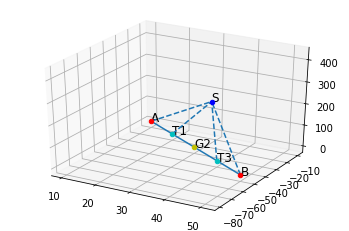

In [3]:
QNET.plot_3d(Q)

To add a satellite of your choice, you can also pass the TLE elements of a satellite to the function. The following code adds the satellite SES 1 to the QNET using its TLE elements (instead of the default ISS Zarya). The start time has been initialised to 50 which implies that the satellite has been initialised in the network at 50 seconds ahead of the current time.  

In [4]:
l1 = '1 36516U 10016A   20150.51240440 -.00000114 +00000-0 +00000-0 0  9994'
l2 = '2 36516 000.0097 331.1561 0002447 090.4012 269.4146 01.00271577036889'
Q = LG.altLinSatGen(5, [10,-10,0], Line1 = l1, Line2 = l2, startTime = 50)

(2020, 5, 29, 23, 25, 26.34156346321106)


### 1.2 Plotting effciency of all paths 

We can now plot the efficiency of the different paths present in the network. For now, let's work with the default ISS Zarya satellite. 

tMax describes the total time in seconds for which the satellite is being tracked. dt describes the time intervals at which the satellite is tracked. 

Hence, the satellite is tracked at the following times: 
[currentTime+startTime, currentTime+startTime+dt, currentTime+startTime+(2*dt), currentTime+startTime+(3*dt),..., tMax].   

In [5]:
# Compute the loss array for all the different paths in a graph
Q = LG.altLinSatGen(5, [10,-10,0])
tMax = 5000
dt = 100
lossArrs = QNET.getCostArrays(Q, 'A', 'B', 'e', tMax, dt)
timeArr = QNET.getTimeArr(tMax, dt)

(2020, 5, 29, 23, 25, 27.469700574874878)


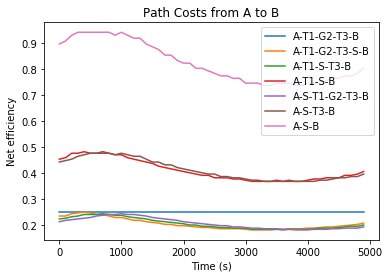

In [6]:
# Plot these loss array
for path in lossArrs:
        plt.plot(timeArr, lossArrs[path], label = path.stringify())

plt.xlabel('Time (s)')
plt.ylabel('Net efficiency')
plt.title('Path Costs from A to B')
plt.legend()

plt.show()

### 1.3 Plotting distance between ground nodes and satellite

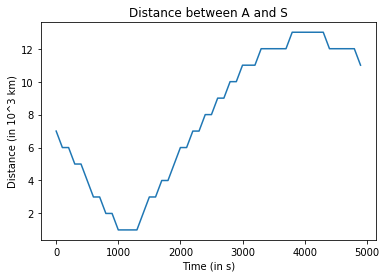

In [7]:
QNET.posPlot(Q, 'A', 'S', tMax, dt)

### 1.4 Plotting map of the graph evolution

Satellite starts at currentTime+startTime (represented by black color) and stops at tMax (represented by red color). The color change from black to red shows progress in time.

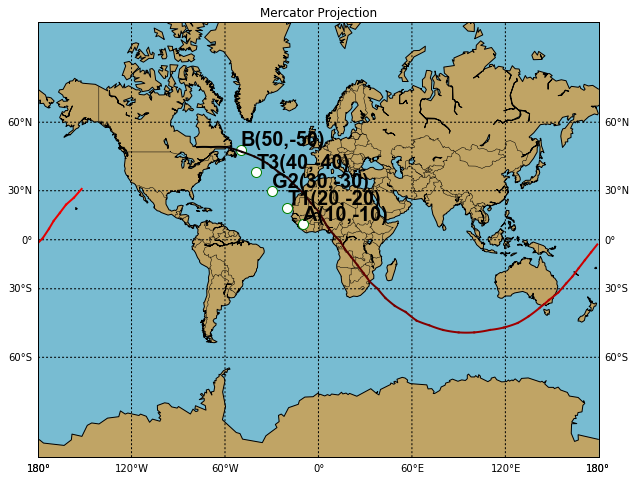

In [8]:
QNET.plotMap(Q, tMax, dt)


Confirm that your satellite ISS Zarya is moving as expected by comparing it with ohter real-time trackers: https://www.n2yo.com/satellite/?s=25544.  